In [1]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('products.csv' , sep='\t')

/tmp/ipykernel_17510/2405384287.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('products.csv' , sep='\t')


In [3]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

# Analyse et nettoyage du dataframe


## Nettoyage des variables

In [4]:
for cat in data:
    if (pd.isnull(data[cat]).sum()>100000 and cat!='pnns_groups_1'): #On séléctionne les variables ayant plus de 100k NaN
        data.drop(labels=cat, axis = 'columns', inplace=True) #On les supprime

In [5]:
data.shape

(320772, 33)

In [6]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,0.0,b,NaN,

In [7]:
#On enlève les autres variables inutiles à la main

basket=['creator','created_t','created_datetime','last_modified_t','ingredients_text','nutrition-score-fr_100g',
        'brands_tags','countries','countries_tags','countries_fr', 'additives','additives_n','nutrition-score-uk_100g',
        'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','states','states_tags','states_fr']
data.drop(labels=basket, axis=1, inplace=True)

In [8]:
data

,code,url,last_modified_datetime,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,d,NaN,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,b,NaN,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,d,NaN,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,NaN,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,b,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,NaN,Salty snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.loc[data['energy_100g'].isnull()]

,code,url,last_modified_datetime,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,18371,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:13Z,Real Salt Granular,Redmond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.15678,37.857
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,2015-06-17T10:11:54Z,Filet de bœuf,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,33084,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:09Z,Fine Sea Salt,Unfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.90582,39.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,2015-11-01T11:20:39Z,Rillette d'oie,"Sans marque,D.Lambert",NaN,Fish Meat Eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320766,99410148,http://world-fr.openfoodfacts.org/produit/9941...,2017-04-03T18:34:58Z,NaN,NaN,NaN,Salty snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,NaN,Salty snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.loc[data['product_name'].isnull()]

,code,url,last_modified_datetime,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,7020254,http://world-fr.openfoodfacts.org/produit/0000...,2015-01-02T14:52:53Z,NaN,A&W,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,9336247,http://world-fr.openfoodfacts.org/produit/0000...,2016-11-13T09:40:10Z,NaN,NaN,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,50157846,http://world-fr.openfoodfacts.org/produit/0000...,2016-12-27T14:08:58Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,69105241,http://world-fr.openfoodfacts.org/produit/0000...,2016-06-26T09:31:59Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320747,9800895250,http://world-fr.openfoodfacts.org/produit/9800...,2017-03-26T18:58:17Z,NaN,NaN,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320748,9802735,http://world-fr.openfoodfacts.org/produit/9802735,2016-09-01T11:09:27Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320752,98709870987,http://world-fr.openfoodfacts.org/produit/9870...,2016-09-24T15:03:13Z,NaN,NaN,NaN,Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320755,988639,http://world-fr.openfoodfacts.org/produit/988639,2017-03-26T18:58:18Z,NaN,NaN,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ici on voit bien que les individus n'ayant pas de valeur 'energy_100g' n'ont presque aucune valeur. On peut donc les enlever. De même on peut enlever les individus n'ayant pas de nom.

In [11]:
data.drop(labels = data.loc[data['energy_100g'].isnull()].index, axis = 0, inplace=True)
data.drop(labels = data.loc[data['product_name'].isnull()].index, axis = 0, inplace=True)

In [12]:
data.shape

(257773, 15)

## Nettoyage des individus

### Détection et suppression des doublons

In [13]:
data['code'].value_counts()

72220009989     2
37600110754     2
21500011907     2
21500042178     2
23923201965     2
               ..
75365067906     1
75365067913     1
75365067920     1
75365068002     1
999990026839    1
Name: code, Length: 257693, dtype: int64

In [14]:
#On va organiser notre dataframe pour supprimer les bons doublons
data.sort_values(by="last_modified_datetime", ascending=False, inplace=True, ignore_index=True)

In [15]:
#On supprime les doublons
data.drop_duplicates(subset=['code'], inplace=True)

In [16]:
#On peut se débarrasser de ces variables
data.drop(labels = ['code', 'last_modified_datetime'], axis = 1 , inplace = True)

### Détection et correction des valeurs négatives

In [17]:
data.loc[data['energy_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [18]:
data.loc[data['fat_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [19]:
data.loc[data['saturated-fat_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [20]:
data.loc[data['carbohydrates_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [21]:
data.loc[data['sugars_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
134134,http://world-fr.openfoodfacts.org/produit/0011...,Grade A Fancy Chopped Spinach,Spartan,a,NaN,151.0,0.00,0.00,3.61,-1.20,2.41,0.38354,0.151000
134166,http://world-fr.openfoodfacts.org/produit/0789...,Crackers,Partners A Tasteful Choice Company,NaN,NaN,1674.0,13.33,3.33,66.67,-6.67,NaN,2.03200,0.800000
136572,http://world-fr.openfoodfacts.org/produit/0021...,"Select, Spicy Red Bell Pepper Pasta Sauce",Signature,b,NaN,167.0,0.80,0.00,7.20,-0.80,0.80,0.87376,0.344000
136955,http://world-fr.openfoodfacts.org/produit/0813...,"Italianavera, Tomato Sauce With Gaeta Olives &...",Italiana Vera Srl,c,NaN,326.0,6.25,1.25,5.00,-6.25,1.25,1.19380,0.470000
171651,http://world-fr.openfoodfacts.org/produit/0608...,"Hummous, Black Truffle",The Wild Pea,a,NaN,598.0,3.57,0.00,21.43,-3.57,7.14,0.95250,0.375000
173700,http://world-fr.openfoodfacts.org/produit/0856...,Organic Pumpkin Seeds,Cb's Nuts,a,NaN,255.0,21.43,3.57,53.57,-17.86,17.86,1.93294,0.761000
226831,http://world-fr.openfoodfacts.org/produit/3161...,Caprice des dieux,Caprice des Dieux,d,Milk and dairy products,1379.0,30.00,21.00,0.80,-0.10,15.30,1.40000,0.551181


In [22]:
#On voit qu'ils ne sont pas totalement incohérents, on va juste les inverser
data.loc[data['sugars_100g'] < 0, 'sugars_100g'] = -data.loc[data['sugars_100g'] < 0, 'sugars_100g']

In [23]:
data.loc[data['sugars_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [24]:
data.loc[data['proteins_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
145853,http://world-fr.openfoodfacts.org/produit/0402...,"Gourmet Blends, Seasoning, Garlic Pepper",Spice Islands,NaN,NaN,0.0,0.00,NaN,0.00,NaN,-500.00,25.40000,10.000
165237,http://world-fr.openfoodfacts.org/produit/0875...,Lightly Dried Cilantro,Gourmet Garden,NaN,NaN,0.0,0.00,NaN,0.00,0.00,-800.00,7.62000,3.000
175708,http://world-fr.openfoodfacts.org/produit/0036...,Whole Cashews,Food Club,d,NaN,2389.0,46.43,8.93,28.57,3.57,-3.57,0.99822,0.393


In [25]:
#Ici deux sur les trois sont vraiment aberrantes, mais on va juste les inverser et on les traitera par la suite
data.loc[data['proteins_100g'] < 0, 'proteins_100g'] = -data.loc[data['proteins_100g'] < 0, 'proteins_100g']

In [26]:
data.loc[data['proteins_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [27]:
data.loc[data['salt_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [28]:
data.loc[data['sodium_100g']<0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


### Cherchons maintenant les individus ayant des valeurs incohérentes et corrigeons les

In [29]:
data.loc[data['fat_100g']<data['saturated-fat_100g']]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
843,http://world-fr.openfoodfacts.org/produit/8722...,"Lipton Alps 20X1.1 GR, 1 Boîte",Lipton,b,NaN,17.0,0.00,0.10,0.50,0.10,0.50,0.000,0.000000
881,http://world-fr.openfoodfacts.org/produit/5449...,Sprite Zero,Sprite,b,Beverages,4.0,0.00,0.01,0.00,0.00,0.00,0.040,0.015748
2886,http://world-fr.openfoodfacts.org/produit/2004...,Saucisson sec,"Le cesarin, Fresh & Easy Llc",e,NaN,1812.0,5.13,14.00,8.33,2.80,24.00,4.600,1.811024
4050,http://world-fr.openfoodfacts.org/produit/8076...,Buongrano,Mulino Bianco,c,NaN,1891.0,0.00,1.60,0.00,20.50,7.70,0.543,0.213780
4119,http://world-fr.openfoodfacts.org/produit/3438...,Choconeige,Bernard Gaborit,c,Milk and dairy products,715.0,4.30,7.70,17.00,5.83,3.55,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248433,http://world-fr.openfoodfacts.org/produit/3250...,Nappage caramel,Netto,d,unknown,1402.0,0.02,0.10,82.20,81.50,0.20,0.010,0.003937
250482,http://world-fr.openfoodfacts.org/produit/3178...,Goûters fourrés au chocolat,Banania,e,Sugary snacks,2066.0,12.00,12.50,66.00,37.00,6.00,0.500,0.196850
250834,http://world-fr.openfoodfacts.org/produit/3560...,champignons de paris emincés,carrefour,c,fruits-and-vegetables,64.0,0.10,0.50,0.80,0.50,2.00,1.524,0.600000
254718,http://world-fr.openfoodfacts.org/produit/3259...,Brotes de judía mungo en conserva ecológicas &...,"Minerve,//Propiedad de://,Minerve S.A.",a,Cereals and potatoes,81.0,0.20,0.30,2.00,1.80,1.50,0.254,0.100000


In [30]:
data.loc[data['carbohydrates_100g']<data['sugars_100g']]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
860,http://world-fr.openfoodfacts.org/produit/7613...,Aproz Thé Grüntee-minze,Aproz,b,NaN,75.00,0.00,0.00,4.50,5.00,0.00,0.00000,0.000000
2385,http://world-fr.openfoodfacts.org/produit/3596...,Sauce tomate basilic,Auchan,b,Fat and sauces,226.00,2.30,0.40,4.50,4.90,1.40,1.00000,0.393701
3645,http://world-fr.openfoodfacts.org/produit/0811...,Alo exposed,Alo,c,NaN,251.00,0.00,0.00,6.25,15.00,0.00,0.03048,0.012000
4050,http://world-fr.openfoodfacts.org/produit/8076...,Buongrano,Mulino Bianco,c,NaN,1891.00,0.00,1.60,0.00,20.50,7.70,0.54300,0.213780
5273,http://world-fr.openfoodfacts.org/produit/3760...,Poires williams et Guyot pressées,Pronatura,c,unknown,259.00,0.10,0.00,12.00,14.80,0.20,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250942,http://world-fr.openfoodfacts.org/produit/3256...,Moussaka à l'huile d'olive vierge extra 0.5% e...,U,a,Composite foods,517.00,9.40,2.30,3.50,4.20,4.60,0.87000,0.342520
252281,http://world-fr.openfoodfacts.org/produit/3222...,Pot-au-feu boeuf et légumes de jardin,Casino,a,Composite foods,340.00,3.60,1.50,1.60,2.00,9.60,0.27000,0.106299
253870,http://world-fr.openfoodfacts.org/produit/5000...,Tomato & Smoked Bacon Sauce,Loyd Grossman,c,Fat and sauces,339.00,4.80,0.90,6.10,6.90,3.00,0.83058,0.327000
253988,http://world-fr.openfoodfacts.org/produit/5060...,Sweet & Spicy Mango Ketchup,NAJ,d,Fat and sauces,814.73,0.24,0.06,39.63,46.59,0.15,0.00000,0.000000


In [31]:
data.loc[data['salt_100g']<data['sodium_100g']]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [32]:
condition = data['fat_100g'] < data['saturated-fat_100g']
data.loc[condition, ['fat_100g', 'saturated-fat_100g']] = data.loc[condition, ['saturated-fat_100g', 'fat_100g']].values

In [33]:
condition = data['carbohydrates_100g'] < data['sugars_100g']
data.loc[condition, ['carbohydrates_100g', 'sugars_100g']] = data.loc[condition, ['sugars_100g', 'carbohydrates_100g']].values

In [34]:
data.loc[data['fat_100g']<data['saturated-fat_100g']]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [35]:
data.loc[data['carbohydrates_100g']<data['sugars_100g']]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


### Détection des individus dont la somme est >100g

In [36]:
basket = data.loc[data['fat_100g']+data['carbohydrates_100g']+data['proteins_100g']+data['salt_100g']>100]
basket

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
876,http://world-fr.openfoodfacts.org/produit/7610...,Chocolat 60% Fourré Praliné - Ragusa Noir,Ragusa,e,NaN,2498.0,39.00,16.000,49.0,40.0,90.000,0.0100,0.003937
932,http://world-fr.openfoodfacts.org/produit/5019...,Butter ghee (beurre clarifié),Khanum,e,Fat and sauces,3757.0,99.80,63.300,0.1,0.1,0.100,0.1000,0.039370
1138,http://world-fr.openfoodfacts.org/produit/8731...,Mentos Mint Rol,Mentos,c,Fat and sauces,1632.0,100.00,1.900,0.1,0.0,0.000,0.0000,0.000000
1683,http://world-fr.openfoodfacts.org/produit/5425...,Huile de coco - Bee&Cee,Bumble bee foods,d,Fat and sauces,3766.0,100.00,91.000,1.0,0.0,0.000,0.0000,0.000000
1906,http://world-fr.openfoodfacts.org/produit/7616...,Pralinor- Und Giandor-eili Assortiert,Frey,e,unknown,2443.0,40.00,20.000,47.0,45.0,7.000,11.0000,4.330709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255012,http://world-fr.openfoodfacts.org/produit/9108...,Chips à l'ancienne Nature,Lay's,c,Salty snacks,2490.0,39.00,4.000,54.0,0.4,6.000,1.3462,0.530000
256833,http://world-fr.openfoodfacts.org/produit/8965...,Açaí Frooty,"Spice,Frooty,Spice Com. Ind. de Alimentos Ltda...",d,unknown,433.0,3.33,0.833,17.5,17.5,0.833,81.7000,32.200000
257226,http://world-fr.openfoodfacts.org/produit/4002...,Icefix,Winsenia,e,unknown,3012.0,58.50,27.400,44.9,43.9,3.300,0.4826,0.190000
257306,http://world-fr.openfoodfacts.org/produit/3421...,Préparation pour Parmentier de boeuf,Alliance Gastronomie,NaN,Composite foods,1678.0,18.80,NaN,65.8,NaN,18.800,2.3368,0.920000


In [37]:
#Ici il nous sera impossible de corriger ces valeurs donc on ne peut que les supprimer
data.drop(labels = basket.index, axis = 0, inplace=True)

In [ ]:
filtered_data.shape

### Suppression des individus ayant trop de valeurs manquantes

In [139]:
# Créons une série booléenne qui indique si chaque individu a plus de 6 valeurs manquantes (NaN ou 0)
has_too_many_missing = (data == 0).sum(axis=1) + data.isnull().sum(axis=1) > 6

# Filtrons le dataframe en ne gardant que les individus qui n'ont pas trop de valeurs manquantes
filtered_data = data[~has_too_many_missing]

In [140]:
filtered_data.shape

(224115, 14)

In [143]:
data = filtered_data.copy()

### Calcul manuel de la valeur energy et comparaison

In [144]:
data['energy_100g_computed']=data['proteins_100g']*4+data['carbohydrates_100g']*4+data['fat_100g']*9

In [145]:
#On vient de voir que energy est une combinaison linéaire de trois variables
#Par un simple calcul on comprend qu'elle ne peut pas dépasser 900
data.loc[data['energy_100g']>1000]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed


In [146]:
#supprimons ces valeurs aberrantes afin de les remplacer par celle calculé par la suite
data.loc[data['energy_100g']>1000,'energy_100g']=np.nan

In [147]:
#Détectons les individus dont nous serons incapables d'obtenir une valeur energy
data.loc[data['energy_100g'].isnull() & data['energy_100g_computed'].isnull()]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed


In [148]:
#Supprimons ces valeurs 
data.drop(labels = data.loc[data['energy_100g'].isnull() & data['energy_100g_computed'].isnull()].index, axis=0, inplace = True)

In [149]:
#Remplaçons les NaN energy par l'energy calculée
data.loc[data['energy_100g'].isnull(),'energy_100g'] = data['energy_100g_computed']

In [150]:
#On crée un intervalle où la valeur energy calculée diffère totalement de la valeur originale
interv = ((data['energy_100g_computed'] < data['energy_100g'] * 0.5) | (data['energy_100g_computed'] > data['energy_100g'] * 1.5)) & (data['energy_100g_computed'].notnull())

In [151]:
data[interv]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed


In [152]:
#Remplaçons maintenant les valeurs qui diffèrent trop de nos calculs
data.loc[interv, 'energy_100g'] = data.loc[interv, 'energy_100g_computed']

In [161]:
#Détectons les individus n'ayant toujours pas de valeur 'energy'
data.loc[data['energy_100g']==0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed


In [162]:
data.drop(labels = data.loc[data['energy_100g']==0].index, axis=0, inplace = True)

In [163]:
data.loc[data['energy_100g']==0]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed


In [167]:
#Détectons les individus ayant toujours une valeur energy trop grande
data.loc[data['energy_100g']>950]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed
115,http://world-fr.openfoodfacts.org/produit/8410...,Pescanova Centros De Salmón,Pescanova,d,NaN,958.0,NaN,16.4,NaN,0.0,20.4,0.1600,0.062992,NaN
251,http://world-fr.openfoodfacts.org/produit/3760...,Le suédois,Croquez Bio,b,unknown,958.0,NaN,1.9,NaN,1.8,12.4,1.1000,0.433071,NaN
308,http://world-fr.openfoodfacts.org/produit/3700...,Purée de pommes poires,Naturalia,b,Fruits and vegetables,962.0,NaN,0.5,NaN,12.4,0.6,0.3300,0.129921,NaN
359,http://world-fr.openfoodfacts.org/produit/3588...,Pruneau fermier,Compagnons du prineau,c,NaN,979.0,NaN,0.1,NaN,35.0,2.0,0.0100,0.003937,NaN
372,http://world-fr.openfoodfacts.org/produit/3564...,Confiture figues de provence,Lucien Georgelin,c,Sugary snacks,1000.0,NaN,0.1,NaN,55.5,0.6,0.0100,0.003937,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233943,http://world-fr.openfoodfacts.org/produit/8436...,oreja cocida al ajillo,Dadyma,NaN,unknown,974.0,15.1,5.5,NaN,NaN,22.5,1.5000,0.590551,NaN
237434,http://world-fr.openfoodfacts.org/produit/3560...,Rillettes de Saumon,Carrefour,NaN,Fish Meat Eggs,993.0,19.0,1.5,NaN,NaN,16.0,1.1000,0.433071,NaN
245780,http://world-fr.openfoodfacts.org/produit/3222...,Gelée extra framboises,Casino,NaN,Sugary snacks,973.0,0.2,NaN,NaN,52.0,NaN,0.0100,0.003937,NaN
249913,http://world-fr.openfoodfacts.org/produit/5203...,Γιαννιώτικο γιαούρτι-προβειο,Κίνηση Κτηνοτρόφων Ιωαννίνων,NaN,unknown,996.0,15.0,7.0,NaN,10.0,NaN,0.2032,0.080000,NaN


In [168]:
data.drop(labels = data.loc[data['energy_100g']>950].index, axis=0, inplace = True)

In [169]:
data.loc[data['energy_100g']>950]

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed


In [186]:
#Nous n'avons plus besoin de 'energy_100g_computed'
data.drop(labels='energy_100g_computed', axis = 1, inplace = True)

# Traitement des valeurs manquantes

In [175]:
data['pnns_groups_1'].value_counts(dropna=False)

NaN                        160346
unknown                     11188
Sugary snacks                9564
Milk and dairy products      7221
Cereals and potatoes         7074
Composite foods              5935
Fish Meat Eggs               5685
Beverages                    5671
Fruits and vegetables        3856
Fat and sauces               3809
Salty snacks                 2325
fruits-and-vegetables         755
sugary-snacks                 378
cereals-and-potatoes           15
salty-snacks                    1
Name: pnns_groups_1, dtype: int64

In [176]:
#On remplace les 'unknown' âr des NaN pour regrouper les valeurs manquantes
data['pnns_groups_1'].replace('unknown', np.nan, inplace=True)

In [213]:
data['pnns_groups_1'].value_counts(dropna=False)

NaN                        171534
Sugary snacks                9564
Milk and dairy products      7221
Cereals and potatoes         7074
Composite foods              5935
Fish Meat Eggs               5685
Beverages                    5671
Fruits and vegetables        3856
Fat and sauces               3809
Salty snacks                 2325
fruits-and-vegetables         755
sugary-snacks                 378
cereals-and-potatoes           15
salty-snacks                    1
Name: pnns_groups_1, dtype: int64

## Combler les valeurs manquantes à l'ai de la méthode iterative imputer selon les pnns groups

In [238]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# séparons le dataframe par valeur de pnns_groups_1
dfs = {}
for pnns_group in data['pnns_groups_1'].dropna().unique():
    dfs[pnns_group] = data[data['pnns_groups_1'] == pnns_group]

# appliquons la méthode iterative imputer aux variables quantitatives
for pnns_group, df in dfs.items():
    imputer = IterativeImputer()
    df[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']] = imputer.fit_transform(df[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']])

# regroupons les dataframes modifiés dans un nouveau dataframe
result = pd.concat(dfs.values())


/home/lolonois/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/tmp/ipykernel_17510/3479815321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']] = imputer.fit_transform(df[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']])
/tmp/ipykernel_17510/3479815321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [230]:
result

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,http://world-fr.openfoodfacts.org/produit/3502...,Ice Tea saveur Pomme,Lipton,d,Beverages,18.4,0.000000,0.0,4.600000,4.4,0.0,0.03000,0.011811
1,http://world-fr.openfoodfacts.org/produit/5449...,Evasion au Soleil Peche Framboise,Nestea,d,Beverages,100.0,0.218990,0.0,6.545764,5.9,0.0,0.04000,0.015748
2,http://world-fr.openfoodfacts.org/produit/3770...,Orange Pamplemousse Citron,Juste Presse,c,Beverages,201.0,0.359053,0.1,10.233735,9.3,0.5,0.00000,0.000000
3,http://world-fr.openfoodfacts.org/produit/3057...,Touche De Thé Citron,Volvic,d,Beverages,67.0,0.228007,0.0,4.490190,3.9,0.0,0.01000,0.003937
4,http://world-fr.openfoodfacts.org/produit/3057...,Juicy agrumes,Volvic,e,Beverages,33.7,0.500000,0.0,6.800000,6.8,0.5,0.01000,0.003937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52284,http://world-fr.openfoodfacts.org/produit/3228...,Brioche tranchée,Harrys,d,sugary-snacks,360.2,13.000000,8.1,52.800000,15.2,8.0,1.09982,0.433000
52285,http://world-fr.openfoodfacts.org/produit/3250...,Chinois crème pâtissière,Netto,d,sugary-snacks,273.6,6.000000,2.0,49.500000,20.6,5.4,0.81026,0.319000
52286,http://world-fr.openfoodfacts.org/produit/3257...,Pains au chocolat,Cora,d,sugary-snacks,412.0,21.600000,11.8,47.400000,13.2,7.0,0.90000,0.354331
52287,http://world-fr.openfoodfacts.org/produit/3256...,Brioche tressée au levain,"Brioche Pasquier,Pasquier",d,sugary-snacks,348.0,14.000000,6.8,47.000000,9.7,8.5,0.93980,0.370000


## Remplacer les valeurs manquantes par la medianne pour les pnns groups inconnus

In [242]:
# créons un dataframe pour les valeurs de pnns_groups_1 manquantes
df_missing_pnns_groups = data[data['pnns_groups_1'].isnull()]

# remplaçons les valeurs manquantes par la médiane
for column in ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
    df_missing_pnns_groups[column].fillna(np.median(df_missing_pnns_groups[column]), inplace=True)


/tmp/ipykernel_17510/1540286957.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_pnns_groups[column].fillna(np.median(df_missing_pnns_groups[column]), inplace=True)


In [243]:
result_final = pd.concat([result, df_missing_pnns_groups])

In [244]:
result_final

,url,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,http://world-fr.openfoodfacts.org/produit/3502...,Ice Tea saveur Pomme,Lipton,d,Beverages,18.40,0.000000,0.0,4.600000,4.40,0.0,0.030000,0.011811
1,http://world-fr.openfoodfacts.org/produit/5449...,Evasion au Soleil Peche Framboise,Nestea,d,Beverages,100.00,0.218990,0.0,6.545764,5.90,0.0,0.040000,0.015748
2,http://world-fr.openfoodfacts.org/produit/3770...,Orange Pamplemousse Citron,Juste Presse,c,Beverages,201.00,0.359053,0.1,10.233735,9.30,0.5,0.000000,0.000000
3,http://world-fr.openfoodfacts.org/produit/3057...,Touche De Thé Citron,Volvic,d,Beverages,67.00,0.228007,0.0,4.490190,3.90,0.0,0.010000,0.003937
4,http://world-fr.openfoodfacts.org/produit/3057...,Juicy agrumes,Volvic,e,Beverages,33.70,0.500000,0.0,6.800000,6.80,0.5,0.010000,0.003937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223818,http://world-fr.openfoodfacts.org/produit/3258...,Bière blonde de luxe,Ecoprix,d,NaN,15.30,0.100000,0.0,3.200000,3.20,0.4,0.000100,0.000039
223819,http://world-fr.openfoodfacts.org/produit/5601...,Spéciale Réserve Porto,Rozes,e,NaN,55.44,0.000000,0.0,13.660000,7.76,0.2,22.860000,9.000000
223820,http://world-fr.openfoodfacts.org/produit/3080...,Kronenbourg,Kronenbourg,d,NaN,11.60,0.000000,0.0,2.500000,0.02,0.4,0.029972,0.011800
223821,http://world-fr.openfoodfacts.org/produit/3080...,Kronenbourg,Kronenbourg,d,NaN,11.60,0.000000,0.0,2.500000,0.02,0.4,0.030480,0.012000


In [245]:
data = result_final.copy()

## Trouver les pnns manquants pas KNN

In [296]:
d = data.copy()

In [297]:
#On se sépare des variables inutiles au KNN
d.drop(labels=['product_name', 'brands', 'url', 'nutrition_grade_fr'], axis=1, inplace=True)

In [298]:
d

,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,Beverages,18.40,0.000000,0.0,4.600000,4.40,0.0,0.030000,0.011811
1,Beverages,100.00,0.218990,0.0,6.545764,5.90,0.0,0.040000,0.015748
2,Beverages,201.00,0.359053,0.1,10.233735,9.30,0.5,0.000000,0.000000
3,Beverages,67.00,0.228007,0.0,4.490190,3.90,0.0,0.010000,0.003937
4,Beverages,33.70,0.500000,0.0,6.800000,6.80,0.5,0.010000,0.003937
...,...,...,...,...,...,...,...,...,...
223818,NaN,15.30,0.100000,0.0,3.200000,3.20,0.4,0.000100,0.000039
223819,NaN,55.44,0.000000,0.0,13.660000,7.76,0.2,22.860000,9.000000
223820,NaN,11.60,0.000000,0.0,2.500000,0.02,0.4,0.029972,0.011800
223821,NaN,11.60,0.000000,0.0,2.500000,0.02,0.4,0.030480,0.012000


In [299]:
#On sépare en deux dataframes
d_pnns=d.drop(labels=d.loc[d['pnns_groups_1'].isnull()].index, axis=0) #Pour entraîner le modèle
d_knn=d.drop(labels=d_pnns.index, axis=0) #Pour appliquer le modèle

In [300]:
#On sépare en deux dataframes
d_pnns=d.drop(labels=d.loc[d['pnns_groups_1'].isnull()].index, axis=0) #Pour entraîner le modèle
d_knn=d.drop(labels=d_pnns.index, axis=0) #Pour appliquer le modèle

#On sépare le df d'entraînement
target=d_pnns['pnns_groups_1']
d_pnns.drop(labels='pnns_groups_1', axis=1, inplace=True)

In [301]:
from sklearn.model_selection import train_test_split as tts
from sklearn import neighbors

x_train, x_test, y_train, y_test = tts(d_pnns, target, train_size=0.75, random_state=42)

#Essayons d'abord avec les 3 plus proches voisins
model = neighbors.KNeighborsClassifier(n_neighbors=3)

model.fit(x_train,y_train)

#Affichons le pourcentage d'erreur du modèle
print((1 - model.score(x_test, y_test))*100)

16.461409010938578


### Ici on voit que knn avec 3 voisins nous donne 16% d'erreur, cherchons maintenant à améliorer ce modèle en cherchant le nombre de voisins optimisé

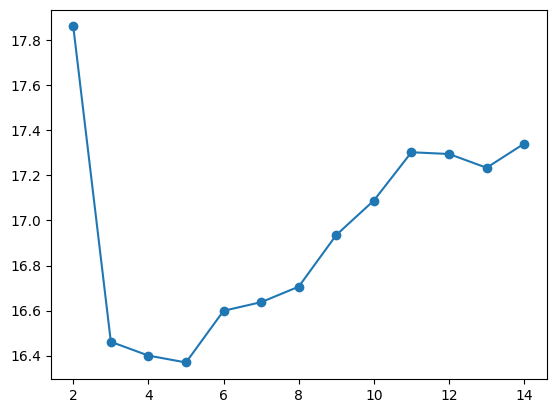

In [302]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

### On voit que le plus optimisé serait les 5 voisins mais on aurait toujours 16% d'erreur, cherchonc la meilleure combinaison de variables à prendre en compte pour avoir le knn le plus précis

In [303]:
import itertools

col_names = d_pnns.columns
combinations = itertools.combinations(col_names, 3)

error_min=100
for i in range(1, len(col_names)):
    combinations = itertools.combinations(col_names, i)
    for comb in combinations:
        labels = []
        for val in comb:
            labels.append(val)
        df = d_pnns.drop(labels = labels, axis=1)
        x_train, x_test, y_train, y_test = tts(df, target, train_size=0.75, random_state=42)
        for k in range(2,15):
            knn = neighbors.KNeighborsClassifier(k)
            error=(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
            if error_min>error:
                error_min=error
                comb_opti=comb
                k_opti=k
            
print(error_min, comb_opti, k_opti)

13.67704428975751 ('energy_100g',) 3


### On voit que le KNN le plus optimisé serait après avoir enlevé la variable energy avec 3 voisins

In [314]:
df=d.drop(labels=d.loc[d['pnns_groups_1'].isnull()].index, axis=0)

In [315]:
df.drop(labels = 'energy_100g', axis=1, inplace = True)

In [316]:
d_knn=d.drop(labels=d.index, axis=0)
target=df['pnns_groups_1']
df.drop(labels='pnns_groups_1', axis=1, inplace=True)
x_train, x_test, y_train, y_test = tts(df, target, train_size=0.75)

In [317]:
knn = neighbors.KNeighborsClassifier(5)
knn.fit(x_train, y_train).score(x_test, y_test)

0.8609347510135393

In [320]:
d_knn_predict = d_knn.drop(labels=['pnns_groups_1','energy_100g'], axis=1)

,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,Beverages,18.40,0.000000,0.0,4.600000,4.40,0.0,0.030000,0.011811
1,Beverages,100.00,0.218990,0.0,6.545764,5.90,0.0,0.040000,0.015748
2,Beverages,201.00,0.359053,0.1,10.233735,9.30,0.5,0.000000,0.000000
3,Beverages,67.00,0.228007,0.0,4.490190,3.90,0.0,0.010000,0.003937
4,Beverages,33.70,0.500000,0.0,6.800000,6.80,0.5,0.010000,0.003937
...,...,...,...,...,...,...,...,...,...
223818,NaN,15.30,0.100000,0.0,3.200000,3.20,0.4,0.000100,0.000039
223819,NaN,55.44,0.000000,0.0,13.660000,7.76,0.2,22.860000,9.000000
223820,NaN,11.60,0.000000,0.0,2.500000,0.02,0.4,0.029972,0.011800
223821,NaN,11.60,0.000000,0.0,2.500000,0.02,0.4,0.030480,0.012000
